# Choropleth maps

files needed = ('ne_50m_admin_0_counties', 'cb_2021_us_county_5m.shp', 'results.csv')

We have figured out how to plot geographic data using geopandas. We needed shape files loaded into geoDataFrames with one column assigned as the geoDataFrame's geometry. Once that is set up, plotting is easy. 

In this notebook we are going to learn how to assign colors to maps based on a variable &mdash; a *choropleth*. We looked at an example of this kind of figure on the first day of class: [Voting patterns in Wisconsin](https://www.cnn.com/election/2020/results/state/wisconsin/president). By the end of this workbook, we will have made a similar map. 

In [1]:
import pandas as pd                         # pandas for data management
import geopandas                            # geopandas for maps work
import matplotlib.pyplot as plt             # matplotlib for plotting details

## Choropleth maps

A choropleth map is one with regions assigned colors based on a variable. 
* 'column' is the column name that holds the variable to color by
* 'cmap' is the color scheme. There are [many](https://matplotlib.org/stable/tutorials/colors/colormaps.html). Review the vizualization notebook for a refresher on what types of color map are appropriate for different applications.  

Let's return to the world map from the *maps* notebook.  

In [2]:
# Load the shape file
world = geopandas.read_file('ne_50m_admin_0_countries.zip')
world.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."


The dataset includes measures of population and GDP. Let's create a map where the color of each country depends on GDP per capita. 

In [3]:
world['gdp_cap'] = world['GDP_MD']/world['POP_EST']
world['gdp_cap'].describe()

count    240.000000
mean       0.019169
std        0.030987
min       -0.120000
25%        0.002526
50%        0.007635
75%        0.023559
max        0.200000
Name: gdp_cap, dtype: float64

In [4]:
world[world['NAME']=='United States of America'][['NAME','gdp_cap','GDP_MD','POP_EST']]

,NAME,gdp_cap,GDP_MD,POP_EST
16,United States of America,0.065298,21433226,328239523.0


These numbers don't make much sense. There must be a scaling issue. This is why we always do sanity checks. Do the data look like we expect?

The GDP data are in millions (US GDP is on the order of trillions). The population data are not adjusted. (US population is around 330 million).

In [5]:
world['gdp_cap'] = world['GDP_MD']/world['POP_EST']*1000000
print('US GDP per capita is {0:,.0f}'.format(float(world[world['NAME']=='United States of America']['gdp_cap'])))

US GDP per capita is 65,298


C:\Users\local_swanson25\Temp\19\ipykernel_13256\4132053508.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('US GDP per capita is {0:,.0f}'.format(float(world[world['NAME']=='United States of America']['gdp_cap'])))


That looks better. Let's check it out once more. 

In [6]:
world = world.sort_values('gdp_cap', ascending=False)
world.loc[:, ['NAME', 'gdp_cap']]

,NAME,gdp_cap
239,Antarctica,200000.000000
108,Monaco,184477.979674
121,Liechtenstein,180856.939951
24,Bermuda,117087.518383
119,Luxembourg,114703.111490
...,...,...
17,S. Geo. and the Is.,0.000000
20,Pitcairn Is.,0.000000
5,Vatican,-120000.000000
227,Heard I. and McDonald Is.,NaN


The data for small places is crazy. Antarctica's GDP per capita doesn't really make sense. Let's only plot countries with populations greater than 50,000. I'm sorry to do this to you, Falkland Islands. 

In [7]:
world[world['POP_EST']<50000].head(10)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,gdp_cap
239,Admin-0 country,3,4,Antarctica,ATA,0,2,Indeterminate,1,Antarctica,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-45.71777 -60.52090, -45.49971...",200000.000000
108,Admin-0 country,6,6,Monaco,MCO,0,2,Sovereign country,1,Monaco,...,None,None,None,None,None,None,None,None,"POLYGON ((7.43867 43.75044, 7.37773 43.73174, ...",184477.979674
121,Admin-0 country,1,6,Liechtenstein,LIE,0,2,Sovereign country,1,Liechtenstein,...,None,None,None,None,None,None,None,None,"POLYGON ((9.58027 47.05737, 9.50234 47.06274, ...",180856.939951
167,Admin-0 country,3,6,France,FR1,1,2,Dependency,1,French Southern and Antarctic Lands,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((69.18486 -49.10957, 69.26514 -...",114285.714286
22,Admin-0 country,1,5,United Kingdom,GB1,1,2,Disputed,1,Falkland Islands,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-58.85020 -51.26992, -58.69751...",82989.994114
182,Admin-0 country,3,6,Denmark,DN1,1,2,Dependency,1,Faroe Islands,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",64012.490242
168,Admin-0 country,3,6,Finland,FI1,1,2,Country,1,Aland,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((19.98955 60.35117, 20.02021 60...",52302.235310
69,Admin-0 country,3,6,San Marino,SMR,0,2,Sovereign country,1,San Marino,...,None,None,None,None,None,None,None,None,"POLYGON ((12.48525 43.90142, 12.42637 43.89409...",48877.731837
18,Admin-0 country,3,5,United Kingdom,GB1,1,2,Disputed,1,British Indian Ocean Territory,...,None,None,None,None,None,None,None,None,"POLYGON ((72.49199 -7.37744, 72.46875 -7.41719...",40000.000000
161,Admin-0 country,4,4,France,FR1,1,2,Dependency,1,Saint Pierre and Miquelon,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-56.15073 46.76240, -56.17168 ...",35851.258963


Time to create the choropleth. The only difference from plotting a "regular" map is that we use the `cmap` option instead of the `color` option. For this example, I will use the [Blues](https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential) colormap. 

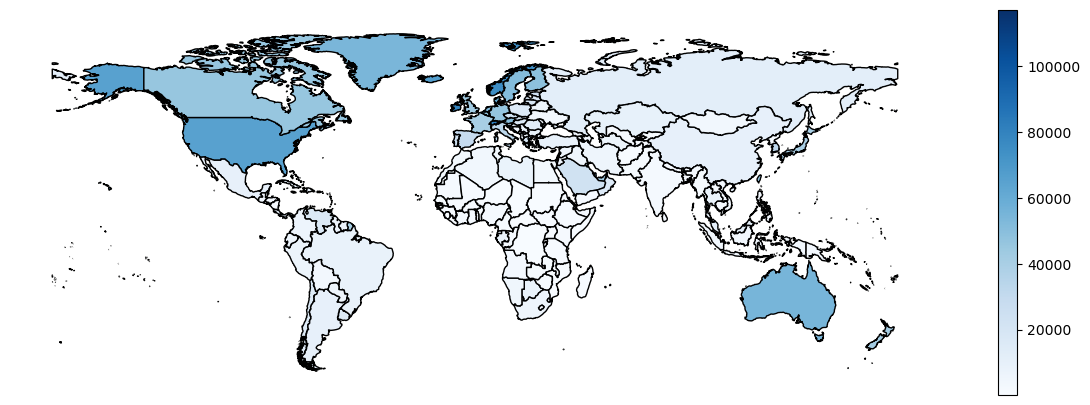

In [8]:
fig, gax = plt.subplots(figsize=(15,5))

world[world['POP_EST']>50000].plot(ax = gax, column='gdp_cap', edgecolor='black', cmap = 'Blues', legend=True)

plt.axis('off')

plt.show()

That legend is atrocious. Never trust the defaults. 

The legend is taking up the entire vertical span of the figure, which I sized at (15,10), even though the map does not. There are two ways to fix this. 

1. Shrink the vertical size. (15,5) starts to look pretty good. 

2. Add a separate legend to our plot. This will require digging into the guts of matplotlib. It's a good thing we are already experienced with matplotlib.  First, we add a separate axis to our plot. Then we will tell the geopandas plot command to add the legend to the new axis. \[This method works on other types of plots as well. It is sometimes useful for heat maps and creating insets.\]

Let's take a look at the second way. It will teach us a bit more about axes, which will come in handy if we ever want to make map insets. 

In [9]:
# import the make_axes_locatable method from matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

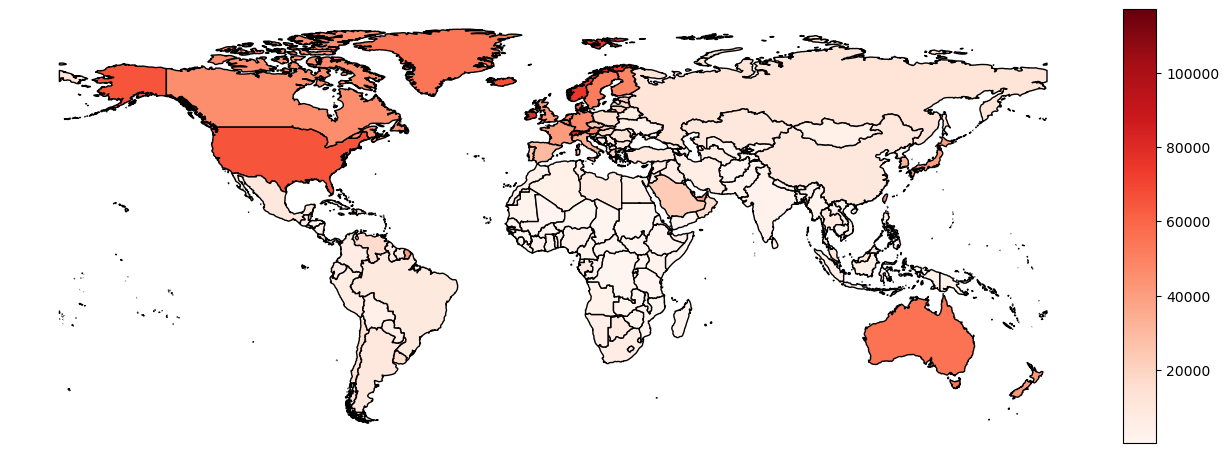

In [10]:
fig, map_ax = plt.subplots(figsize=(15,10))

# Adapted from https://geopandas.org/en/stable/docs/user_guide/mapping.html

# Create an axis divider object. It allows us to add another axis to the current one (map_ax).
divider = make_axes_locatable(map_ax)

# Add a second axis to the right of the original axes. 
# Make the new axes 3% of the original and add some padding between them.
legend_ax = divider.append_axes('right', size='3%', pad=0.1)


# The plot command works like normal, but: we plot the map on the map_ax (using the ax option)
# and we plot the legend on the legend_ax (using the cax option).
world[world['POP_EST']>50000].plot(
                                   ax = map_ax,                          # give ax the axes for the map
                                   column='gdp_cap',                     # the quantitative column
                                   edgecolor='black',                    # set the edge color
                                   cmap = 'Reds',                        # set the color map
                                   legend=True, cax=legend_ax)           # give cax the legend axes
                                   
                                                
# Here I ony turn off the axis of the main plot
map_ax.axis('off')

plt.show()

You can experiment with different padding, widths, locations, and color maps. 

## Top Hat Practice Exercise: Maps 2

At the end of the *maps* notebook we created a map of Wisconsin's counties. We learned not only how to plot shape files, but where to find the shape files. 

Now let's color the map to reflect voting patterns in the 2020 presidential election. 

The steps:

1. Plot the county borders
3. Merge data on votes with geographical data
4. Color the map

We have already figured out the first step. The code below reproduces the map we finished with in the *maps* notebook. 

### 1. Plot the county borders


To read the data
```python
# Read in the counties shape file.
counties = geopandas.read_file('cb_2021_us_county_5m.zip')

# WI fips code is 55. Keep just the WI counties.
wi_counties = counties[counties['STATEFP']=='55'].copy()
wi_counties.head(2)
```

To make the plot
```python
fig, gax = plt.subplots(figsize=(10,10))
wi_counties.plot(ax=gax, edgecolor='black', color = 'white')
plt.axis('off')
plt.show()
```


In [11]:
# Read in the counties shape file.
counties = geopandas.read_file('cb_2021_us_county_5m.zip')

# WI fips code is 55. Keep just the WI counties.
wi_counties = counties[counties['STATEFP']=='55'].copy()
wi_counties.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
21,55,139,01581129,0500000US55139,55139,Winnebago,Winnebago County,WI,Wisconsin,06,1125859770,372631716,"POLYGON ((-88.88667 44.24262, -88.76620 44.243..."
48,55,017,01581068,0500000US55017,55017,Chippewa,Chippewa County,WI,Wisconsin,06,2611628507,85233303,"POLYGON ((-91.66565 45.20799, -91.54223 45.206..."


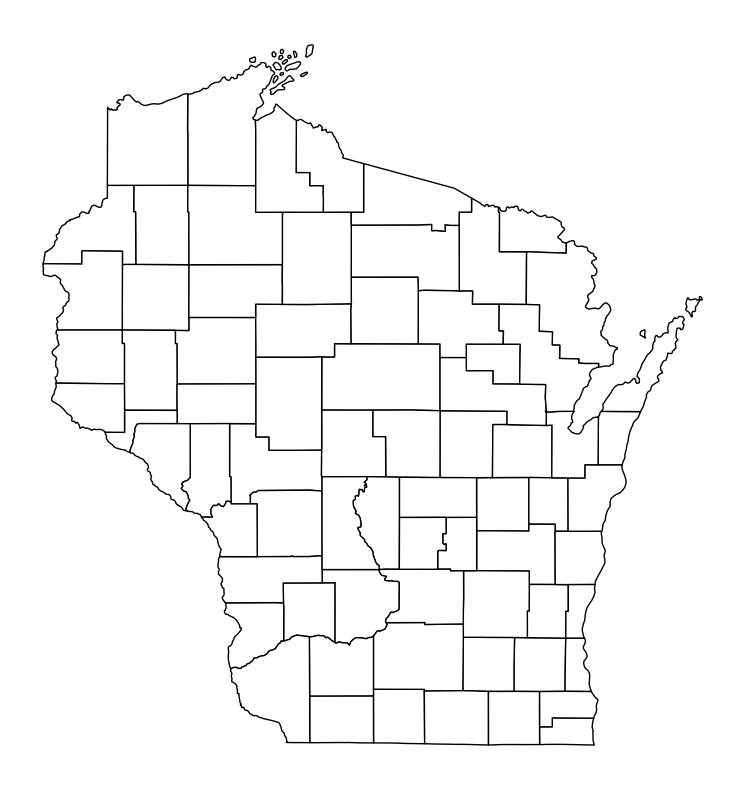

In [12]:
fig, gax = plt.subplots(figsize=(10,10))
wi_counties.plot(ax=gax, edgecolor='black', color = 'white')
plt.axis('off')
plt.show()

### 2. Get the vote totals and merge them 

Time to add the voter totals. I downloaded the results from the [Wisconsin Elections Commission website](https://elections.wi.gov/elections/election-results/results-all#accordion-868). The file is 'County by County Report all offices.xlsx'. Go ahead and open up the file. It's a mess! 

I saved a cleaned-up version of the file to 'results.csv' which we can use to save the hassle with cleaning the data. For fun, you should load the raw data and try beating it into shape. That's what you normally would have to do...and, it's fun.

**2(a).**  Load 'results.csv' to a DataFrame named `results`. Note, this is not a GeoDataFrame, this data doesn't have a geometery to it, it just has county names and vote counts.

**Check your dtypes!**

In [13]:
results = pd.read_csv('results.csv', thousands=',')
results.head()

,county,total,biden,trump
0,ADAMS,11818,4329,7362
1,ASHLAND,8757,4801,3841
2,BARRON,25346,9194,15803
3,BAYFIELD,10880,6147,4617
4,BROWN,144017,65511,75871


In [14]:
results.dtypes

county    object
total      int64
biden      int64
trump      int64
dtype: object

We need to standardize the county names to that we can merge the vote totals with the county shapefile. Let's make the county names 'title case'. We should also remove any extra whitespace. We know how to fix this up. 

**2(b).** Convert the county names in `results` to title case. Strip any leading/trailing whitespace in the county names.

In [15]:
# First letter cap only
results['county'] = results['county'].str.title()
results['county'] = results['county'].str.strip()
results.head(1)

,county,total,biden,trump
0,Adams,11818,4329,7362


**2(c).** Convert the county names in `wi_counties` to title case. Strip any leading/trailing whitespace in the county names.

In [16]:
# Kill any leading or trailing whitespace
wi_counties['NAME']=wi_counties['NAME'].str.title()
wi_counties['NAME']=wi_counties['NAME'].str.strip()

**2(d).** Merge `wi_counties` and `results`. Use the indicator option in the merge, and check that everything matched up using `.value_counts()`. There are 72 counties in Wisconsin.

In [17]:
# Merge the two data sets. 
res_w_states = pd.merge(left=wi_counties, right=results, left_on='NAME', right_on='county', how='outer', indicator=True)
res_w_states.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,county,total,biden,trump,_merge
0,55,139,01581129,0500000US55139,55139,Winnebago,Winnebago County,WI,Wisconsin,06,1125859770,372631716,"POLYGON ((-88.88667 44.24262, -88.76620 44.243...",Winnebago,94032,44060,47796,both
1,55,017,01581068,0500000US55017,55017,Chippewa,Chippewa County,WI,Wisconsin,06,2611628507,85233303,"POLYGON ((-91.66565 45.20799, -91.54223 45.206...",Chippewa,35938,13983,21317,both


In [18]:
res_w_states['_merge'].value_counts()

_merge
both          72
left_only      0
right_only     0
Name: count, dtype: int64

**2(e).** Create a variable called 'trump_share' that is the share of trump votes out of the total vote count.

In [19]:
res_w_states['trump_share'] =res_w_states['trump']/res_w_states['total']
res_w_states.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,county,total,biden,trump,_merge,trump_share
0,55,139,01581129,0500000US55139,55139,Winnebago,Winnebago County,WI,Wisconsin,06,1125859770,372631716,"POLYGON ((-88.88667 44.24262, -88.76620 44.243...",Winnebago,94032,44060,47796,both,0.508295
1,55,017,01581068,0500000US55017,55017,Chippewa,Chippewa County,WI,Wisconsin,06,2611628507,85233303,"POLYGON ((-91.66565 45.20799, -91.54223 45.206...",Chippewa,35938,13983,21317,both,0.593160


### 4. Color the map

Create a chloropeth map with colors that correspond to Trump's share of the vote. 

Remember the extra arguments.

1. `column` is set to the column name of the data we want to be 'colored'
2. `cmap` determines the color scheme. Try 'Reds' or 'bwr' or 'seismic'.
3. `legend` turn on the legend

If you use a *diverging color map*, like 'bwr,' you might want to specify the [min and max values](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) for the legend. (Why?) 

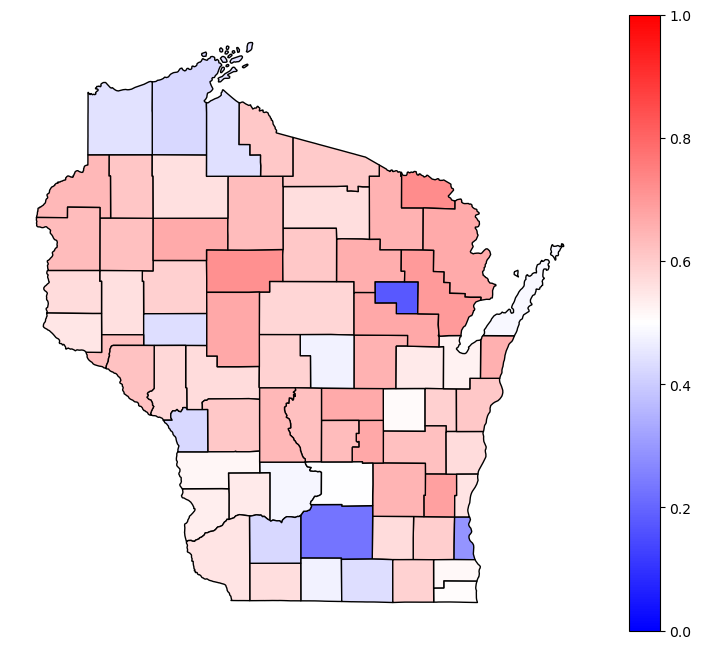

In [20]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the counties and pass 'trump_share' as the data to color
res_w_states.plot(ax=gax, edgecolor='black', column='trump_share',  legend=True, cmap='bwr', vmin=0, vmax=1)

plt.axis('off')

plt.show()

4. Try changing the edge color of the counties to white. 
5. Add a title to your legend. Use the ` legend_kwds={'label': 'Legend title text'}` option of the plot command. ([docs](https://geopandas.org/en/stable/docs/user_guide/mapping.html#creating-a-legend)).

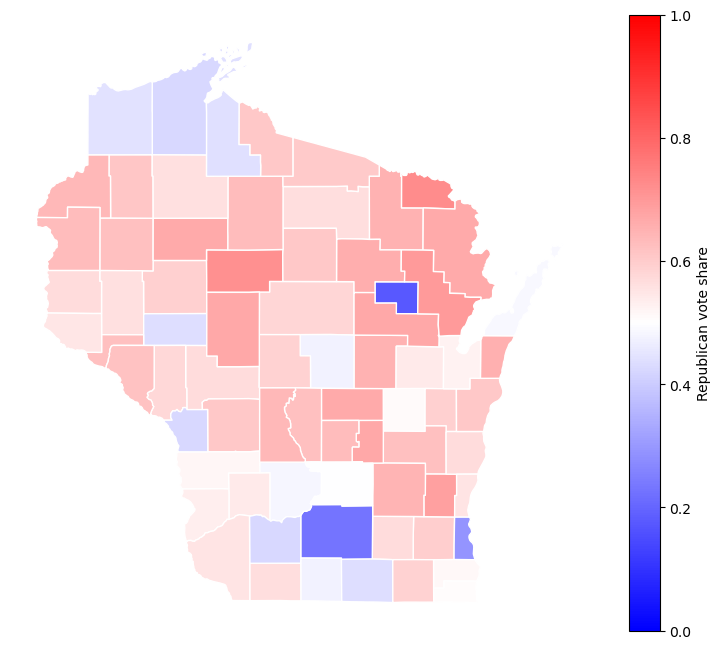

In [21]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the counties and pass 'trump_share' as the data to color
res_w_states.plot(ax=gax, edgecolor='white', column='trump_share',  legend=True, cmap='bwr',
                 legend_kwds={'label':'Republican vote share'}, vmin=0, vmax=1)

plt.axis('off')

plt.show()

## Finish early?

1. Use the 'cities_4269' file on the course website and add Kenosha, Green Bay, Madison, and Milwaukee to your map. Try a white color and a black outline for the circle. Experiment with different combinations of colors and edge colors. What works best?
2. Label the cities. 

In [22]:
cities = geopandas.read_file('cities_4269/cities_4269.shp')
cities.head(1)

,city,rank,state,growth_fro,population,geometry
0,West Allis,582.0,Wisconsin,-0.6,60697.0,POINT (-88.00703 43.01668)


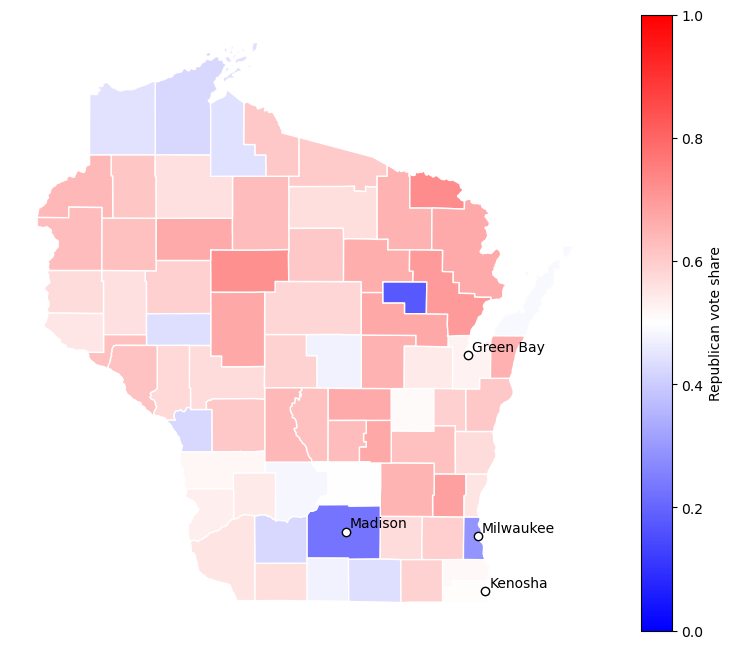

In [23]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the counties and pass 'trump_share' as the data to color
res_w_states.plot(ax=gax, edgecolor='white', column='trump_share',  legend=True, cmap='bwr',
                  legend_kwds={'label':'Republican vote share'}, vmin=0, vmax=1)

cities_for_labels = cities[cities['city'].isin(['Madison', 'Green Bay', 'Milwaukee', 'Kenosha'])]

# Plot the points
cities_for_labels.plot(ax=gax, edgecolor='black', color='white')

# Label the points
for x, y, label in zip(cities_for_labels['geometry'].x, cities_for_labels['geometry'].y, cities_for_labels['city']):
    gax.annotate(label, xy=(x,y), xytext=(3,3), textcoords='offset points')

plt.axis('off')

plt.show()

## Even more!

The labels on the map on [CNN](https://www.cnn.com/election/2020/results/state/wisconsin/president) have a white "shadow" around them. It's not too hard to add this to our labels. This technique works for any matplotlib text (and other objects, too). See this documentation for [path effects](https://matplotlib.org/stable/users/explain/artists/patheffects_guide.html#path-effects-guide) if you are interested in learning more.

1. Start by importing the patheffects module from matplotlib. This gives us some more tools. 

```python
import matplotlib.patheffects as PathEffects
```

2. The patheffects option in `.annotate()` takes a list of values. Try this: 

```python
.annotate(label, xy=(x,y), xytext=(3,3), textcoords='offset points',  
          path_effects=[PathEffects.withStroke(linewidth=3, foreground='white')]
          )
```
    Experiment with different line widths, colors...

In [24]:
import matplotlib.patheffects as PathEffects

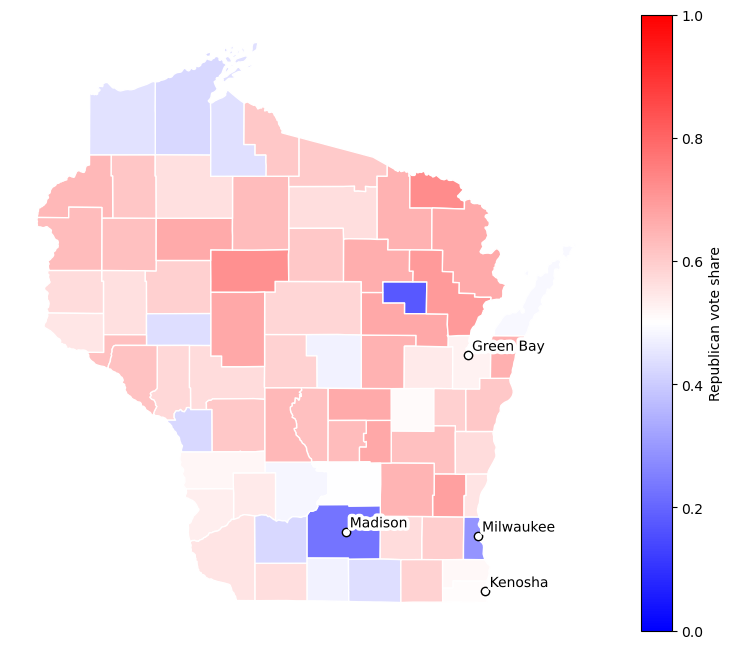

In [25]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the counties and pass 'trump_share' as the data to color
res_w_states.plot(ax=gax, edgecolor='white', column='trump_share',  legend=True, cmap='bwr',
                  legend_kwds={'label':'Republican vote share'}, vmin=0, vmax=1)


cities_for_labels = cities[cities['city'].isin(['Madison', 'Green Bay', 'Milwaukee', 'Kenosha'])]

# Plot the points
cities_for_labels.plot(ax=gax, edgecolor='black', color='white')

# Label the points
for x, y, label in zip(cities_for_labels['geometry'].x, cities_for_labels['geometry'].y, cities_for_labels['city']):
    gax.annotate(label, xy=(x,y), xytext=(3,3), textcoords='offset points',  
                 path_effects=[PathEffects.withStroke(linewidth=5, foreground='white')]
                 )

plt.axis('off')

plt.show()